# Coursework One - Q2 - Titanic Prediction - Student

Please List Members of Team and Student IDs below:

- Member 1: Alban Potteivin - 72205

- Member 2: Greta Bruno - 73702

- Member 3: Manuel Minichillo - 73711

- Member 4: Simone Gennari - 87254

Which member of the team is responsible for this notebook: 
- Simone Gennari - 87254
- Alban Poittevin - 72205

## Instructions

This is the Titanic data set you already saw. You are going to use this as a first classification task.

1. Load the file titanic/train.csv. This is the only data you will use.

2. Visualise and analyse the data. 

3. Your aim is to predict the survived column.

4. Handle categorical and other data.

5. Look for missing data and other issues.

6. Visualise the data and look for outliers to remove.

7. Split the data into a 33% test and 66% training set.

8. Use a logistic regression, KNN, decision tree and SVM model to see which performs best

9. By removing one feature at a time and seeing its effect, find the most important features.

10. Briefly discuss your results.

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import HelpfulFunctions as hp
import seaborn as sns

#For Graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

plt.style.use('seaborn')
%matplotlib inline

## 1. Load the Data

In [2]:
# Load the titanic dataframe
data_df = pd.read_csv('titanic/train.csv')

## 2. Analyze the data

In [3]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Now, let's look at the info of the dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.1 Missing Values

In [5]:
#Look for missing values
data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Look for duplicates
data_df.duplicated().sum()

0

**Observation**
- Age has 177 null values but could still be a good predictor of survival. To use this variable I substitute the missing Age values with the median of the non-null value
- We see that the feature **Cabin** has a lot of null values, thus we can drop it
-**Embarked** has 2 missing values --> I fill the missing values with the mode

In [7]:
data_df['Age'] = data_df['Age'].fillna(data_df['Age'].median())
data_df.drop(columns= ['Cabin'], inplace= True)
data_df['Embarked'] = data_df['Embarked'].fillna(data_df['Embarked'].mode()[0])

### 2.2 Removing irrelevant data

**Removing non relevant features** <br>
**PassengerId**, **Name** and **Ticket** will not be useful to predict if a passenger survived during the Titanic accident.

In [8]:
#Drop the features mentionned above
data_df.drop(columns= ['PassengerId','Name','Ticket'], inplace= True)

### 2.3 Handling Categorical data

#### 2.3.1 One hot Encoding - "Embarked" feature
The feature **Embarked** is an object type with three value possible: 'S', 'C', 'Q' <br>
Let's use one hot encoding to get int values

In [9]:
#Unique element
data_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
temp_df = pd.get_dummies(data_df.Embarked)
temp_df.columns = [ "Embarked_"+n for n in list(temp_df.columns)]
data_df.drop(columns=["Embarked"], inplace= True)
data_df=data_df.join(temp_df)

#### 2.3.2 Label encoding - "Sex" feature
The feature **Sex** is binary *M* and *F*. Let's use label encoding to convert the data.

In [11]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()
data_df.Sex = le.fit_transform(data_df.Sex)

### 2.4 Visualising the data

### 2.4.1 Histograms

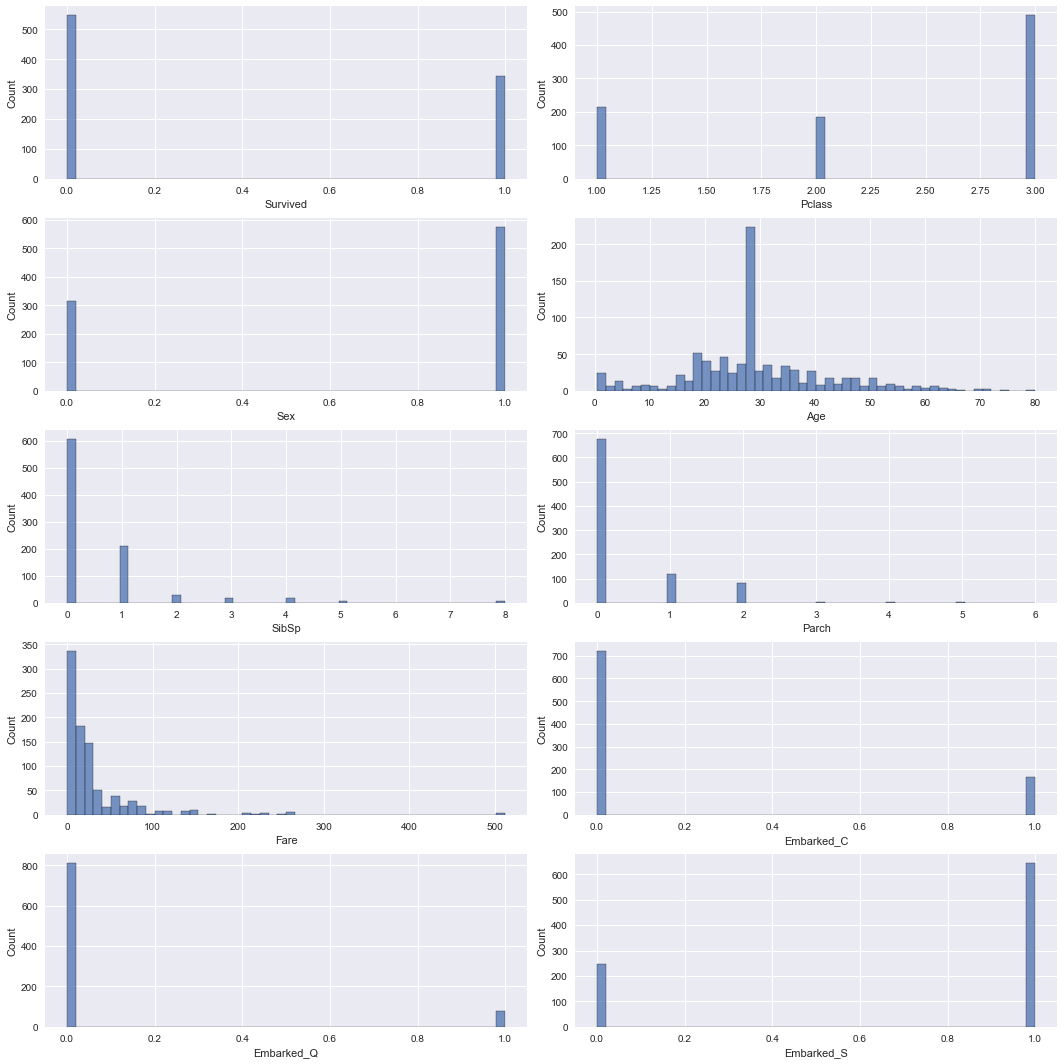

In [13]:
fig, ax = plt.subplots(5, 2, figsize=(15,15))
fig.tight_layout(pad=2.0)
i, j = 0, 0 #counter
for feature, values in data_df.items():
    sns.histplot(values, ax=ax[i,j], bins=50)
    ax[i,j].set_xlabel(feature)
    j+=1
    if j == 2:
        i, j = i+1, 0
    if i==5:
        break

**Observation:** 
Possible outliers problem for Fare. Many concentrated values for Age since the n/a were filled with the median

### 2.4.2 Some Features and their relation with Survived

C:\Users\banba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\banba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\banba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\banba\anaconda3\lib\si

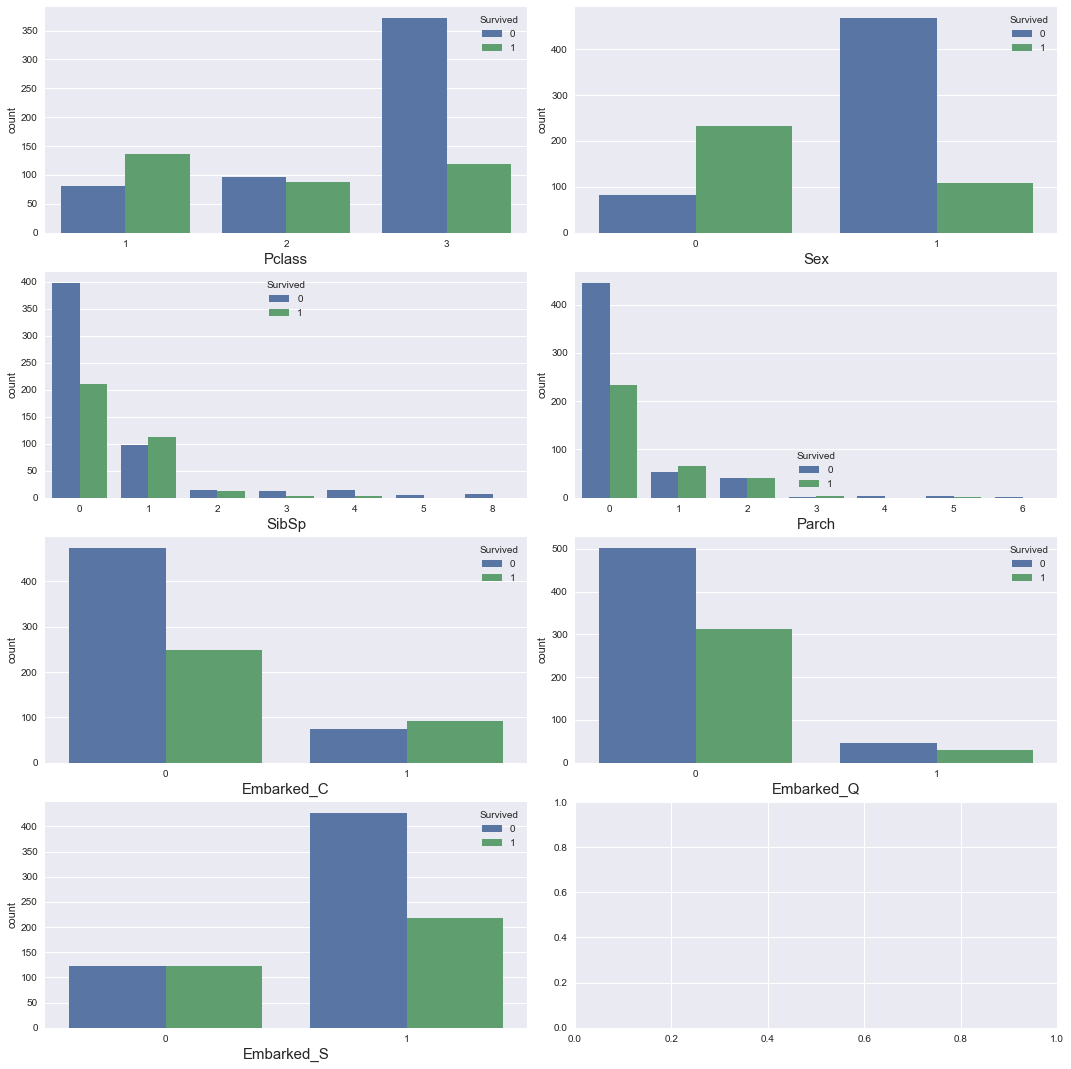

In [14]:
temp_df = data_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
fig, ax = plt.subplots(4, 2, figsize=(15,15))
fig.tight_layout(pad=2.0)
i, j = 0, 0 #counter
for feature, values in temp_df.items():
    sns.countplot(values, ax=ax[i,j], hue= data_df.Survived)
    ax[i,j].set_xlabel(feature, fontsize=15)
    j+=1
    if j == 2:
        i, j = i+1, 0
    if i==4 and j==1:
        break;


**Observation:** Sex and Pclass might be a good indicator of if a passenger Survived or not

#### 2.4.3 Percentage who survived by Sex & Class

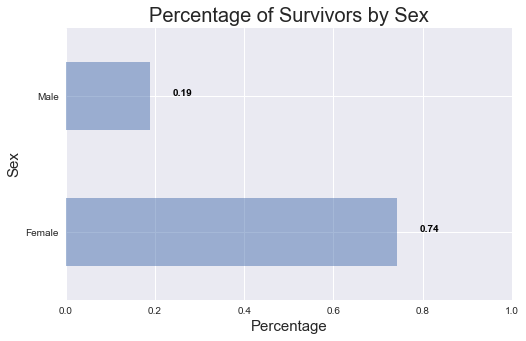

In [15]:
#By SEX
df_survived = data_df[data_df.Survived==1]
plt.figure(figsize=(8,5))
num = df_survived.Sex.value_counts().sort_index()
den = data_df.Sex.value_counts().sort_index()
pct=num/den
pct.plot(kind='barh', alpha=0.5)
#Format
plt.yticks([0,1], ["Female", "Male"])
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Sex",  fontsize=15)
plt.text( pct[1]+ 0.05, 1, str(round(pct[1],2)), color='black', fontweight='bold', fontsize=10)
plt.text(pct[0] + 0.05, 0, str(round(pct[0],2)), color='black', fontweight='bold', fontsize=10)
plt.xlim(xmax=1)
plt.title("Percentage of Survivors by Sex", fontsize=20);  

**Observation:** most of the women on board survived, while most men did not. This confirms that Sex could be an important explanatory variable.

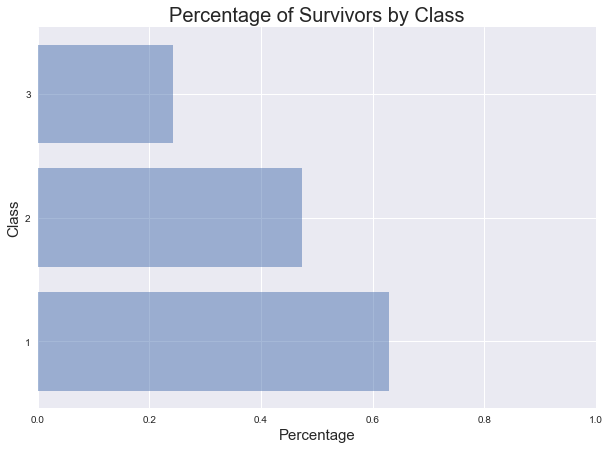

In [16]:
#By Class
df_survived = data_df[data_df.Survived==1]
num = df_survived.Pclass.value_counts().sort_index()
den = data_df.Pclass.value_counts().sort_index()
pct=num/den

#Plot
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(pct.index, pct.values, alpha=0.5)
ax.set_title("Percentage of Survivors by Class", fontsize=20)

#Format
ax.set_yticks([1,2,3])
ax.set_xlabel("Percentage", fontsize = 15)
ax.set_ylabel("Class", fontsize = 15)
ax.set_xlim(xmax=1);

**Observation:** this confirms that the class could also be a good explanatory variable

## 3. Remove Outliers & Feature Standardization

### 3.1 Remove Outliers
Treating **Fare Values**: We consider Fare values to be outliers if they are bigger(or smaller) than mean +(or -) 3*std and drop them.

In [17]:
#Compute Stats
Fare_mean = data_df['Fare'].mean()
Fare_std = data_df['Fare'].std()
FareHigh = Fare_mean + (3 * Fare_std)
FareLow  = Fare_mean - (3 * Fare_std)
#Drop
FareOutliers_index = data_df[(data_df['Fare'] > FareHigh) | (data_df['Fare'] < FareLow)].index 
data_df = data_df.drop(data_df.index[FareOutliers_index])

### 3.2 Feature Standardization

In [18]:
from scipy.stats import zscore

We standardize the values of Fare and Age to improve the data quality

In [19]:
#Create an un-standardized copy
unstd_df= data_df.copy(deep=True)
#Standardize the values of Fare and Age 
standard_df = data_df[["Fare", "Age"]].apply(zscore)
data_df.drop(columns=["Fare", "Age"],inplace=True)
data_df = data_df.join(standard_df)
data_df = data_df.rename(columns={'Fare': 'S_Fare', 'Age': 'S_Age'})

## 4. Using Models - Logistic Regression, KNN, Decision Tree, and SVM Classifier

### 4.1 Train, test, split

In [20]:
#Load the metrics, classification report, and confusion matrix from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

In [21]:
#Prepare the data
X = data_df.drop(['Survived'], axis=1)
y = data_df['Survived']

In [22]:
#Train test split the data: Test = 33% , Train = 66% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 1082)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(583, 9)
(288, 9)
(583,)
(288,)


### 4.2 Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0     0.8378    0.8031    0.8201       193
           1     0.6311    0.6842    0.6566        95

    accuracy                         0.7639       288
   macro avg     0.7345    0.7437    0.7383       288
weighted avg     0.7696    0.7639    0.7662       288

------------------------------------------------------------
Confusion matrix


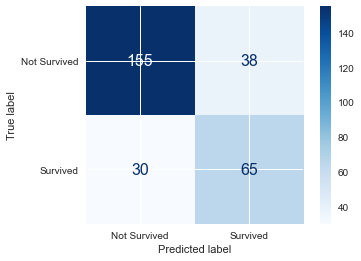

In [24]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_log = log_reg.predict(X_test)
print(classification_report(y_test, y_log, digits=4))
print(60*'-')
print("Confusion matrix")
hp.plot_cm(log_reg, X_test, y_test, labels=['Not Survived','Survived']);

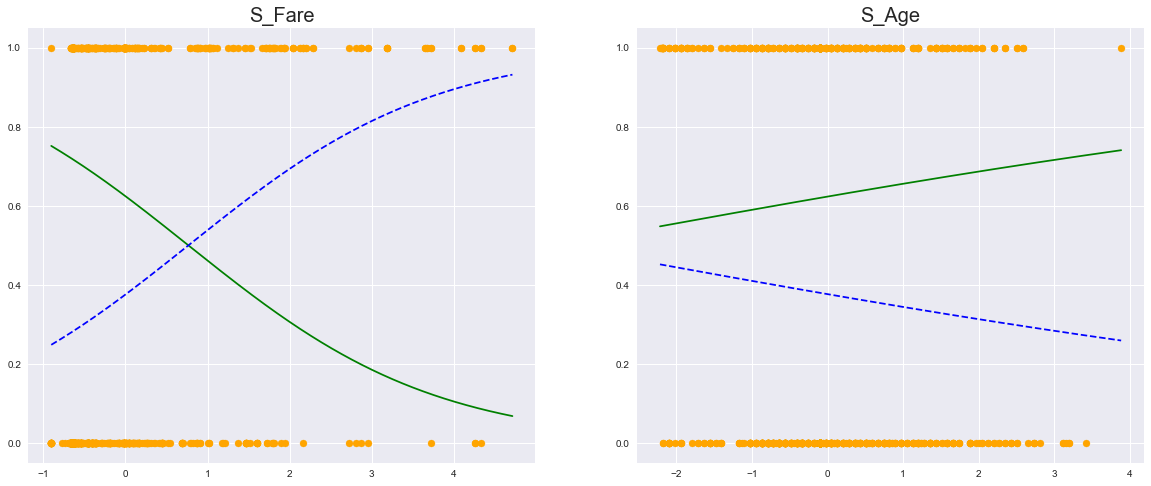

In [25]:
#Let's now low at the logistic regression for each S_Fare & S_Age

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,8))
i, j = 0, 0 #Counter
log_reg = LogisticRegression(solver='liblinear')

for i, feature in enumerate(list(data_df[["S_Fare", "S_Age"]].columns)):
    #Train & Predict
    X_train_f = data_df[feature].values.reshape(-1,1)
    log_reg.fit(X_train_f, y)
    X_new = np.linspace(X_train_f.min(),X_train_f.max(),1000).reshape(-1,1)
    y_proba = log_reg.predict_proba(X_new)
    
    #Plot
    ax[i].scatter(data_df[feature], data_df.Survived, color='orange')
    ax[i].set_title(feature, fontsize=20)
    
    ax[i].plot(X_new,y_proba[:,0],"g-",label="Dead",)
    ax[i].plot(X_new,y_proba[:,1],"b--",label="Survived")

**Observation:** when Age is used as the only feature, the Logistic Regression performs really poorly

### 4.3 K Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

We try to understand how the KNN model performs for different values of K and then we plot the results in a graph to have a better understanding.

In [27]:
#Tyranny of the majority - Use the max value of K to avoid that
K_max = min(y_train.value_counts()[1]*2 - 1, len(y_train) - 1)

#Dataframe to stock the value of the metrics for each value of K
metrics_df = pd.DataFrame(columns=["K","Accuracy","Recall","precision","F1"])

for k in range(1,K_max+1,1): #K_max+1 to include k = K_max
    #Fit & Prediction
    knn = KNeighborsClassifier(n_neighbors = k, p=2, weights="distance")
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    #Metrics
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #Append to df
    new_row = {"K": k,"Accuracy":acc,"Recall": recall,"precision": precision,"F1": f1}
    metrics_df = metrics_df.append(new_row, ignore_index=True)

metrics_df.set_index("K", drop=True, inplace= True)

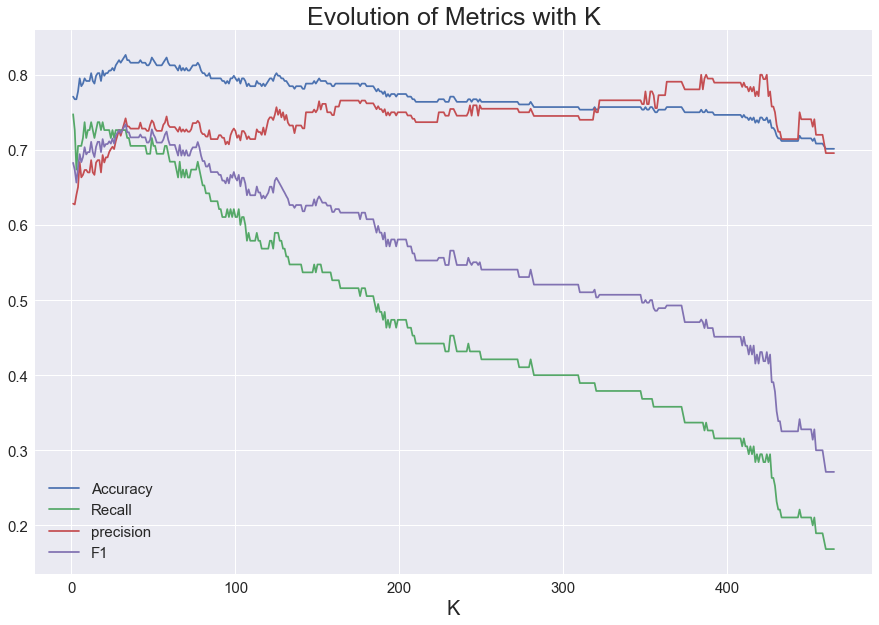

In [28]:
#Plot the data
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(metrics_df)
ax.set_title("Evolution of Metrics with K", fontsize=25)
#Axis
ax.set_xlabel("K", fontsize=20)
ax.tick_params(labelsize=15)

ax.legend(metrics_df.columns, loc="lower left", fontsize=15)

We then go further by using Grid Search to **tune the hyperparameters** of the KNN classifier and find the best performing **p**, **K**, and **weights**

In [29]:
#Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV

# Dict of hyperparameters to optimize
param_grid = {"n_neighbors": list(range(1,K_max,2)), 
              "weights": ("uniform", "distance"), 
              "p": (1,2)}
#n_neighbors is a list of odd number

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = ["accuracy",'f1'], refit="accuracy")
grid.fit(X_train,y_train)

print ("Best accuracy score: %5.3f"%grid.best_score_)
#Parameter setting that gave the best results
print (grid.best_params_)
print (grid.best_estimator_)

Best accuracy score: 0.815
{'n_neighbors': 27, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=27)


Choose **K=27**, **p=1**, and **weights=uniform** since they give the best Accuracy score

              precision    recall  f1-score   support

           0     0.8390    0.8912    0.8643       193
           1     0.7470    0.6526    0.6966        95

    accuracy                         0.8125       288
   macro avg     0.7930    0.7719    0.7805       288
weighted avg     0.8087    0.8125    0.8090       288

------------------------------------------------------------
Confusion matrix


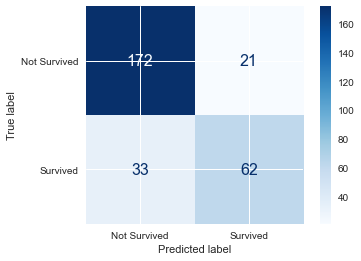

In [30]:
#Using the selected hyperparameters
K=27
knn = KNeighborsClassifier(K, weights='uniform',p=1) 
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print(classification_report(y_test, y_predknn, digits=4))
print(60*'-')
print("Confusion matrix")
hp.plot_cm(knn, X_test, y_test, labels=['Not Survived','Survived']);

**Observation:** KNN is the best performing model so far

### 4.4 Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source

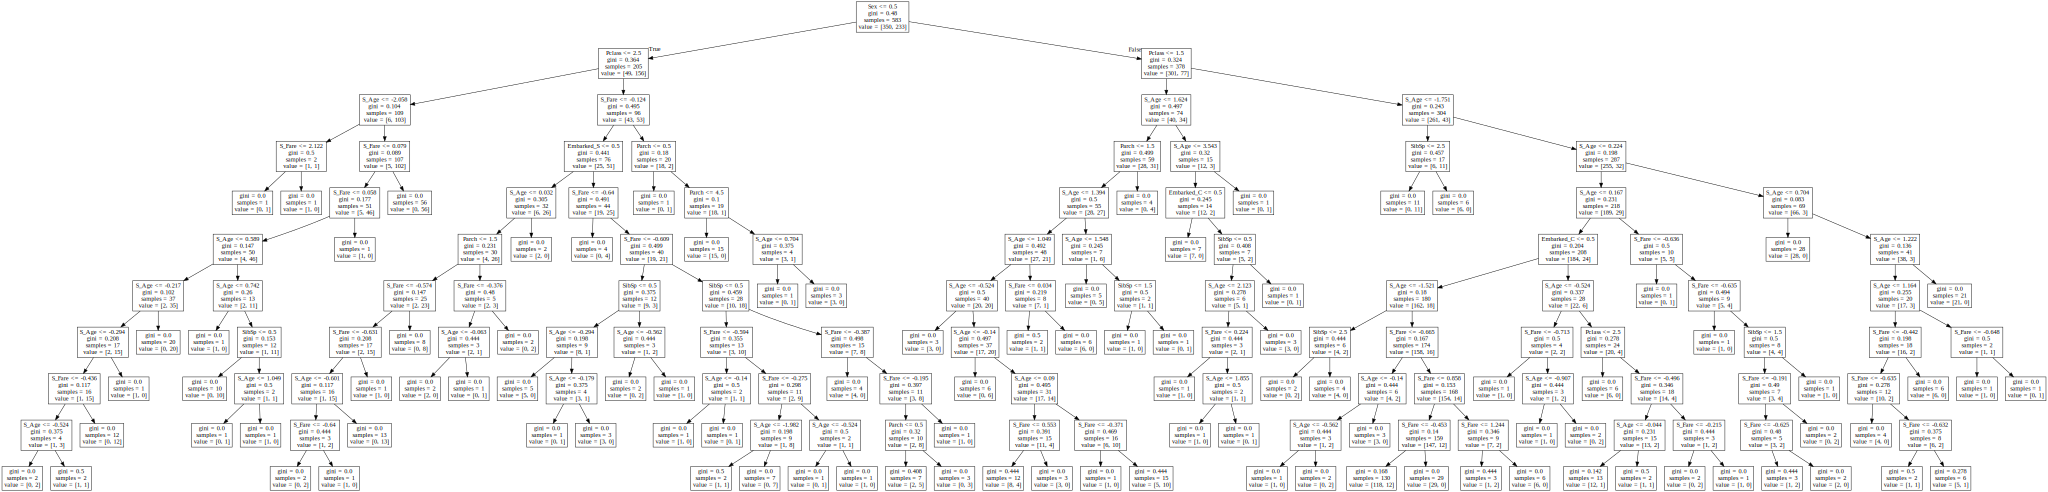

In [32]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=1082)
dtree = dtree.fit(X_train, y_train)
y_dtree = dtree.predict(X_test)

from IPython.display import SVG
graph = Source(export_graphviz(dtree, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

**Observation:** with a max depth of 10, a gini=0 in every ending node it is not achieved.

              precision    recall  f1-score   support

           0     0.8564    0.8342    0.8451       193
           1     0.6800    0.7158    0.6974        95

    accuracy                         0.7951       288
   macro avg     0.7682    0.7750    0.7713       288
weighted avg     0.7982    0.7951    0.7964       288

------------------------------------------------------------
Confusion matrix


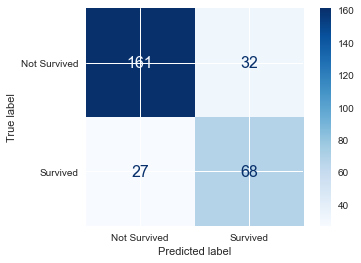

In [33]:
print(classification_report(y_test, y_dtree, digits=4))
print(60*'-')
print("Confusion matrix")
hp.plot_cm(dtree, X_test, y_test, labels=['Not Survived','Survived']);

### 4.5 Supporting Vector Machine

              precision    recall  f1-score   support

           0     0.8429    0.8342    0.8385       193
           1     0.6701    0.6842    0.6771        95

    accuracy                         0.7847       288
   macro avg     0.7565    0.7592    0.7578       288
weighted avg     0.7859    0.7847    0.7853       288

------------------------------------------------------------
Confusion matrix


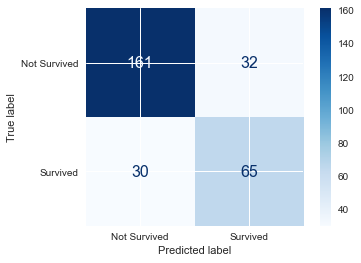

In [34]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1000)
svc.fit(X_train,y_train)
y_svc = svc.predict(X_test)

print(classification_report(y_test, y_svc, digits=4))
print(60*'-')
print("Confusion matrix")
hp.plot_cm(svc, X_test, y_test, labels=['Not Survived','Survived']);

### 4.6 Identifying the Best Model

In [35]:
def best_model(X,y):
    #Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1082)
    
    #Models
    log_reg = LogisticRegression(solver='liblinear')
    knn = KNeighborsClassifier(n_neighbors = 27, p = 1, weights = "uniform")
    dtree = DecisionTreeClassifier(max_depth=10, random_state=1082)
    clf  = SVC(kernel='linear', C= 1000)
    
    list_model=["Logistic Regression", "KNN", "Decision Tree", "SVC"]
    
    #Train
    log_reg.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dtree.fit(X_train,y_train)
    clf.fit(X_train,y_train)
    
    #Predict
    y_log= log_reg.predict(X_test)
    y_knn= knn.predict(X_test)
    y_dtree= dtree.predict(X_test)
    y_svc= clf.predict(X_test)
    
    list_pred=[y_log,y_knn,y_dtree,y_svc]
    
    #Metrics
    df_metrics = pd.DataFrame(columns=["Model","Accuracy","F1_score"])
    for i, y in enumerate(list_pred):
        #Metrics
        acc = accuracy_score(y_test, y)
        f1 = f1_score(y_test, y)
        
        new_row = {"Model": list_model[i],"Accuracy":round(acc,4),"F1_score": round(f1,4)}
        df_metrics = df_metrics.append(new_row, ignore_index=True)
        
    #Set Model as index
    df_metrics.set_index("Model", drop= True, inplace= True)
    
    #Sort df on Accuracy and F1_score
    df_metrics.sort_values(by=["Accuracy", "F1_score"], axis = 0, ascending = False, inplace = True)
    
    return(df_metrics)

In [36]:
best_model(X,y)

,Accuracy,F1_score
Model,,
KNN,0.8125,0.6966
Decision Tree,0.7951,0.6974
SVC,0.7847,0.6771
Logistic Regression,0.7639,0.6566


**K Neares Neighbour is the best model** since it gives the best value for Accuracy and a F1 score really close to the best one

## 5. Identifying Most Important Features

To evaluate which feature is the most important we take the best performing model (KNN) and remove the features one by one and then we compute again the metrics

In [37]:
Var_df = pd.DataFrame(index=["Accuracy", "F1_Score"], columns=X_train.columns)
#Loop on the features
for feature in list(Var_df.columns):
    #Model
    knn = KNeighborsClassifier(n_neighbors = 27, p = 1, weights = "uniform")
    
    #Drop feature
    X_train_bis = X_train.drop(columns=[feature])
    X_test_bis = X_test.drop(columns=[feature])
    
    #Train
    knn.fit(X_train_bis,y_train)
    #Predict
    y_knn= knn.predict(X_test_bis)
    
    #Metrics
    acc = accuracy_score(y_test, y_knn)
    f1 = f1_score(y_test, y_knn)
    
    #Put data in the df
    Var_df.loc["Accuracy", feature] = round(acc,4)
    Var_df.loc["F1_Score", feature] = round(f1,4)

Var_df

,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,S_Fare,S_Age
Accuracy,0.7951,0.7292,0.8056,0.8056,0.8194,0.8125,0.8194,0.8229,0.7778
F1_Score,0.6878,0.5301,0.6818,0.6782,0.7204,0.7033,0.7204,0.7052,0.619


**The most important variable in predicting if a passenger survived is Sex**. In fact, by removing it from the model both the Accuracy and the F1_Score drop by many percentage points.
The same cannot be said about other variables such as the Embarked dummies since the model performs better when they are not included. 

### Conclusion

After removing irrelevant features, outliers and standardizing the data we tried to predict the Survived column by employing four different types of classifiers: Logistic Regression, K Nearest Neighbours, Decision Tree, and Supporting Vector Machine.
    
- **The four models performed in a good manner**, all achieving an accuracy of over 76% on the test set. 

- The model that performed the worse was the Logistic Regression (76.39% accuracy) while the one that achieved the best results was the **K Nearest Neighbour classifier (81.25% accuracy)**. 

- The most explanatory feature is the Sex of the passenger.